# IMPORT PACKAGE

In [44]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn import metrics
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

# LOAD DATA 

Pada final project ini saya memilih data netflix, karena banyak sekali pengguna netflix pada sekarang ini mualai dari streaming film maupun melihat tv show. Menurut data yang saya dapatkan jumlah subscriber untuk netflix terdapat 158 juta.

In [46]:
train = pd.read_csv('netflix_titles.csv')

In [6]:
train.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# DATA PREPROCESSING

In [8]:
 train.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

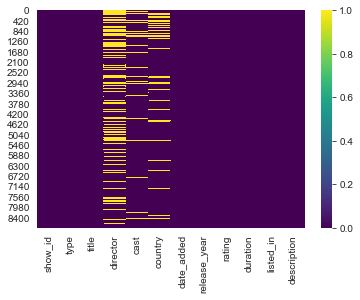

In [9]:
sns.heatmap(train.isnull(),cmap = 'viridis')

In [7]:
train['rating'].value_counts().unique()

array([3207, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    1], dtype=int64)

In [8]:
train.drop(['director','cast'],axis = 1,inplace = True)

In [9]:
train.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
train['country'].replace(np.nan, 'United States',inplace  = True)

In [11]:
train.drop(['date_added'],axis =1,inplace = True)

In [12]:
train.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
train['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

In [14]:
train['listed_in'].value_counts()

Dramas, International Movies                                 362
Documentaries                                                359
Stand-Up Comedy                                              334
Comedies, Dramas, International Movies                       274
Dramas, Independent Movies, International Movies             252
                                                            ... 
British TV Shows, Classic & Cult TV, Kids' TV                  1
Comedies, Cult Movies, LGBTQ Movies                            1
Crime TV Shows, International TV Shows, TV Mysteries           1
Comedies, Dramas, Sports Movies                                1
International TV Shows, Reality TV, TV Action & Adventure      1
Name: listed_in, Length: 514, dtype: int64

In [15]:
train['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [16]:
train.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [17]:
train.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   country       8807 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating        8807 non-null   object
 6   duration      8804 non-null   object
 7   listed_in     8807 non-null   object
 8   description   8807 non-null   object
dtypes: int64(1), object(8)
memory usage: 619.4+ KB


In [19]:
print("Train Data:")
print(train.isnull().sum(), "\n")

Train Data:
show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64 



In [20]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [21]:
train.campaign=np.log(train.release_year)

In [22]:
X=train.drop('rating',1)
y=train.rating

In [23]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)

In [24]:
X.head()

,release_year,show_id_s1,show_id_s10,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1002,show_id_s1003,show_id_s1004,show_id_s1005,...,description_Yılmaz Erdoğan's lauded stage play traces the life of wunderkind Gülseren as she navigates social and political change.,"description_Zack Snyder and his ""Army of the Dead"" team dive into the film's wild stunts, groundbreaking effects and the evolution of the zombie genre.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.","description_Zoe Walker leaves her quiet life behind to investigate her brother's disappearance in Ibiza, where she quickly heads down a decadent and dangerous path.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.
0,2020,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y.head()

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
Name: rating, dtype: object

# Scale Numeric Data

In [25]:
# Copying original dataframe
train_ready = train.copy()

scaler = StandardScaler()
num_cols = ['release_year']
train_ready[num_cols] = scaler.fit_transform(train_ready[num_cols])

train_ready.head()

,release_year,show_id_s1,show_id_s10,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1002,show_id_s1003,show_id_s1004,show_id_s1005,...,description_Yılmaz Erdoğan's lauded stage play traces the life of wunderkind Gülseren as she navigates social and political change.,"description_Zack Snyder and his ""Army of the Dead"" team dive into the film's wild stunts, groundbreaking effects and the evolution of the zombie genre.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.","description_Zoe Walker leaves her quiet life behind to investigate her brother's disappearance in Ibiza, where she quickly heads down a decadent and dangerous path.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.
0,0.659930,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.773324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.773324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.773324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.773324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Encode Categorical Value

In [48]:
# Copying original dataframe
train_ready = train.copy()

encoder = OneHotEncoder(sparse=False)
cat_cols = ['show_id', 'type', 'title', 'country','rating', 'duration', 'listed_in', 'description']

# Encode Categorical Data
train_encoded = pd.DataFrame(encoder.fit_transform(train_ready[cat_cols]))
train_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
train_ready = train_ready.drop(cat_cols ,axis=1)
train_ready = pd.concat([train_encoded, train_ready], axis=1)

# Encode target value
train_ready['release_year'] = train_ready['release_year'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', train_ready.shape)
train_ready.head()

Shape of dataframe: (8807, 27897)


,show_id_s1,show_id_s10,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1002,show_id_s1003,show_id_s1004,show_id_s1005,show_id_s1006,...,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.","description_Zoe Walker leaves her quiet life behind to investigate her brother's disappearance in Ibiza, where she quickly heads down a decadent and dangerous path.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.,director,cast,date_added,release_year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Kirsten Johnson,NaN,"September 25, 2021",0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"September 24, 2021",0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",0


# Split Data

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (7045, 41861)
Shape of testing feature: (1762, 41861)
Shape of training label: (7045,)
Shape of training label: (1762,)


# Exploratory Data Analysis & Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

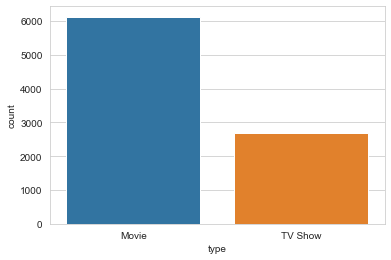

In [26]:
sns.countplot(x='type',data = train)

<AxesSubplot:xlabel='rating', ylabel='count'>

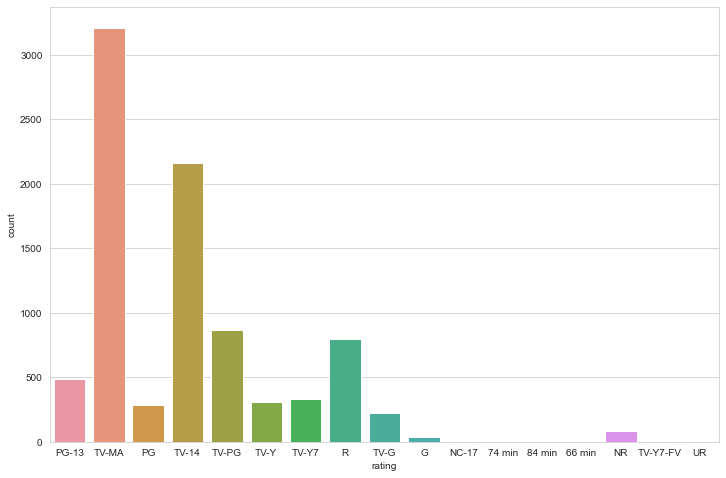

In [27]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = train)

<AxesSubplot:xlabel='release_year', ylabel='count'>

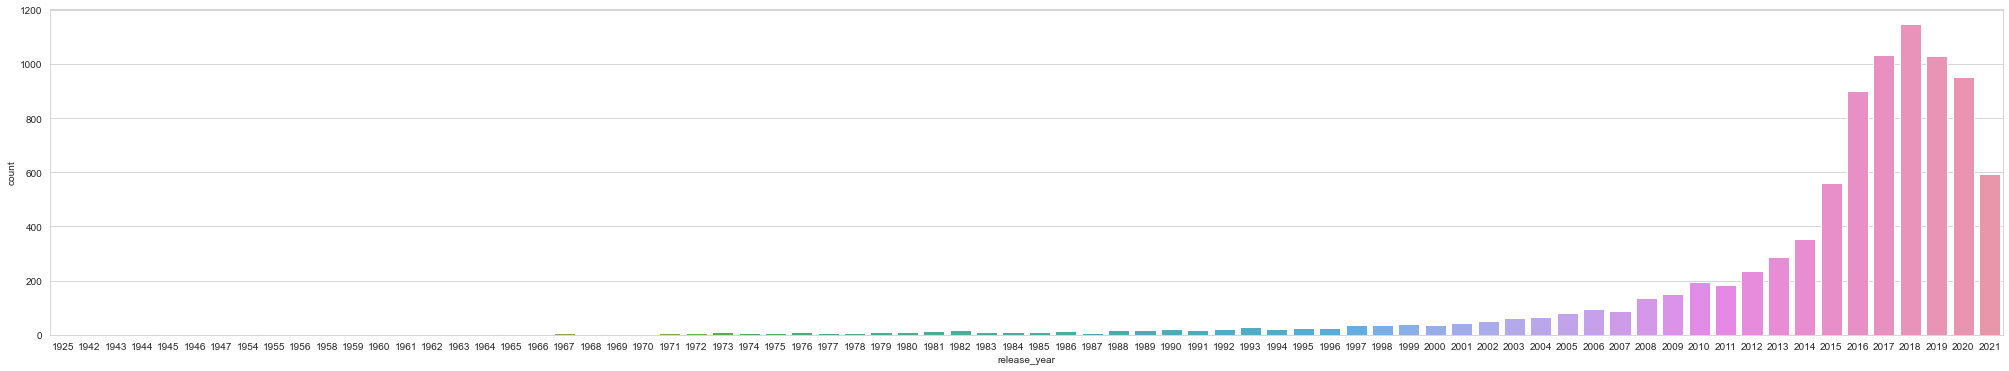

In [28]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = train)

<AxesSubplot:xlabel='rating', ylabel='type'>

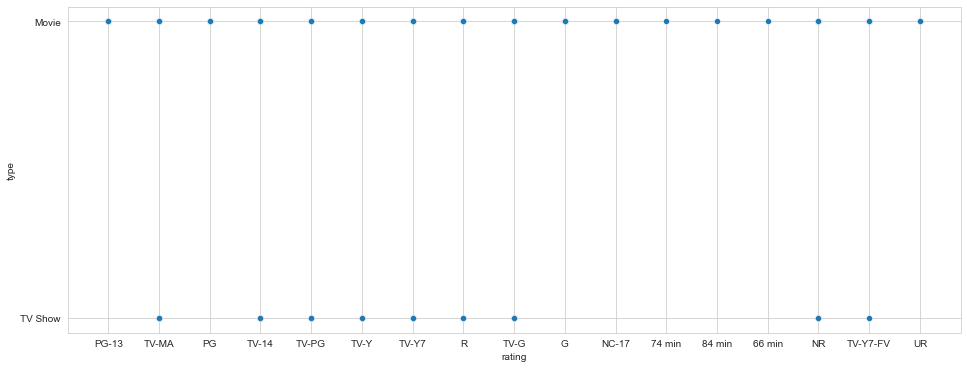

In [29]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = train)

<AxesSubplot:xlabel='rating', ylabel='count'>

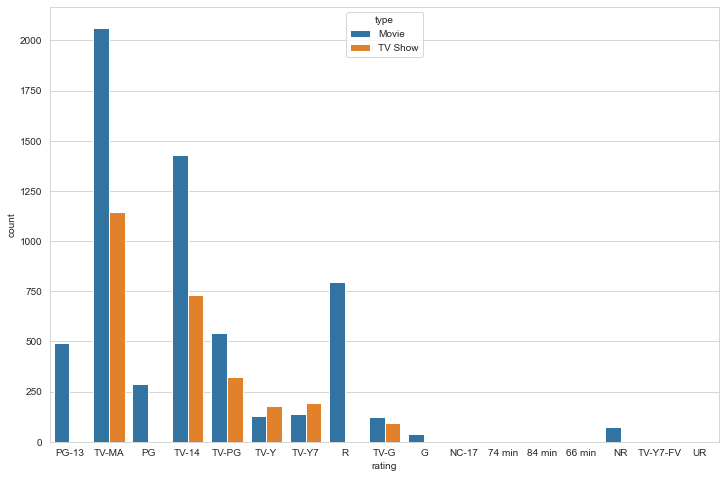

In [30]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = train,hue='type')

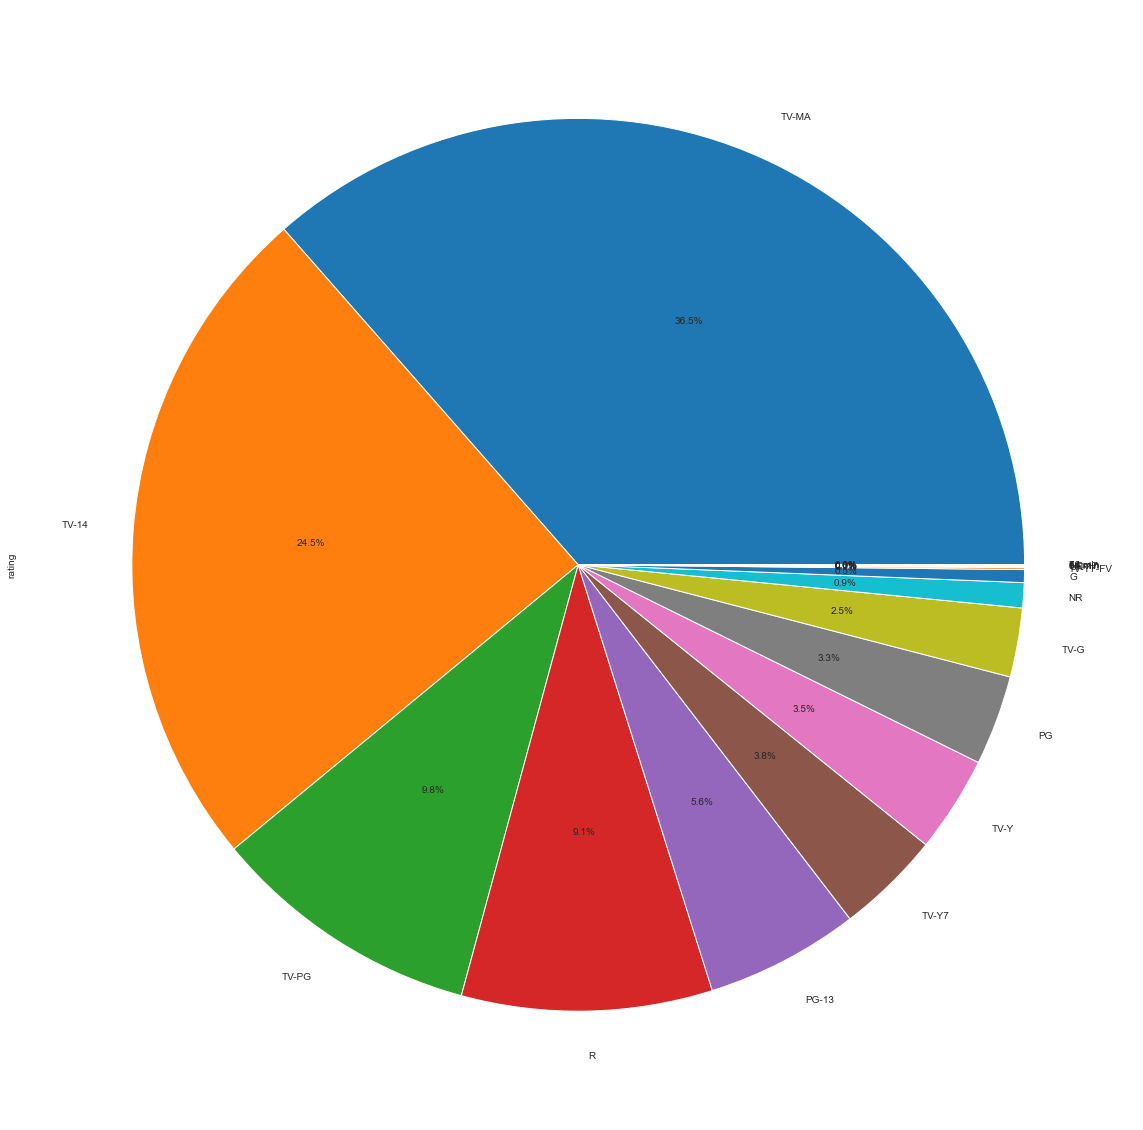

In [39]:
train['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) #distribution according to the rating
plt.show()

In [44]:
old = train.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


In [45]:
tag = "Stand-Up Comedy" 
train["relevant"] = train['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = train[train["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
359,The Original Kings of Comedy,United States,2000
388,Plastic Cup Boyz: Laughing My Mask Off!,United States,2021
400,Revelations: The Masters of the Universe: Reve...,United States,2021
475,The Stand-Up,United States,2019
484,Lee Su-geun: The Sense Coach,United States,2021
511,Chelsea,United States,2017
826,Bo Burnham: Inside,United States,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014
1249,Blanche Gardin: The All-Nighter,United States,2021


In [46]:
tag = "Kids' TV" 
train["relevant"] = train['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = train[train["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
34,Tayo and Little Wizards,United States,2020
40,He-Man and the Masters of the Universe,United States,2021
67,Saved by the Bell,United States,1994
85,Pokémon Master Journeys: The Series,United States,2021
87,Titipo Titipo,United States,2019
89,Mighty Raju,United States,2017
97,Kid Cosmic,United States,2021
100,Tobot Galaxy Detectives,United States,2019
106,Bunk'd,United States,2021
123,Luv Kushh,United States,2012


In [47]:
train_countries = pd.DataFrame(train.country.value_counts().reset_index().values, columns=["country", "count"])
train_countries.head()

,country,count
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [49]:
date = pd.DataFrame(train.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
date.head()

,Year,Count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

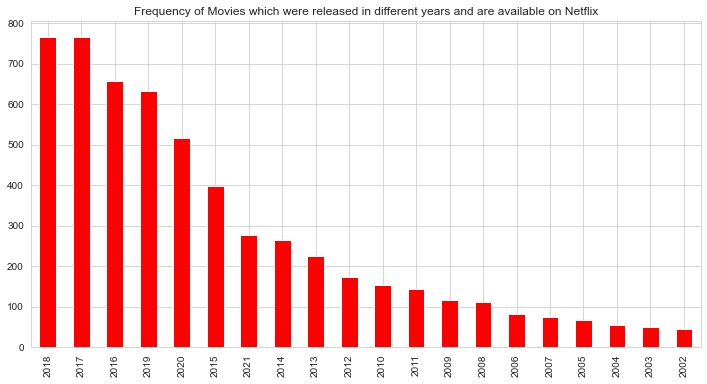

In [50]:
plt.figure(figsize=(12,6))
train[train["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

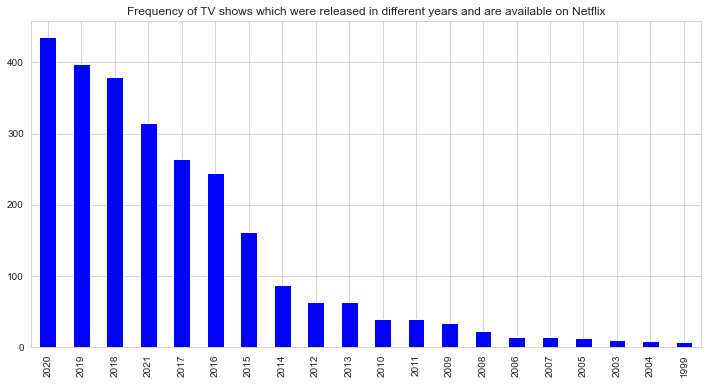

In [51]:
plt.figure(figsize=(12,6))
train[train["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

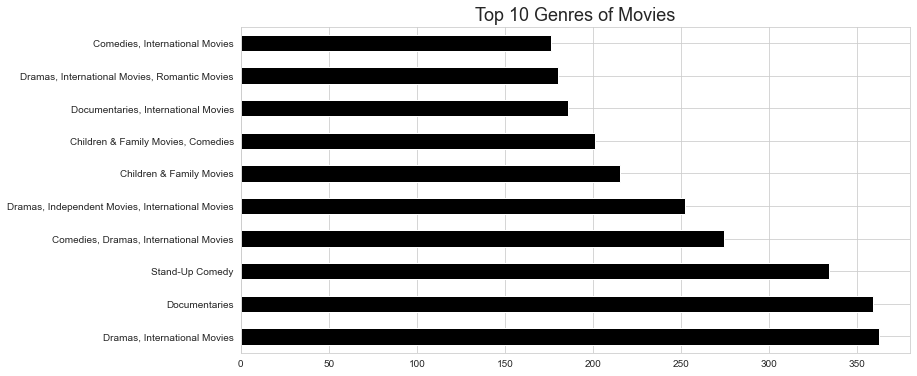

In [52]:
plt.figure(figsize=(12,6))
train[train["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

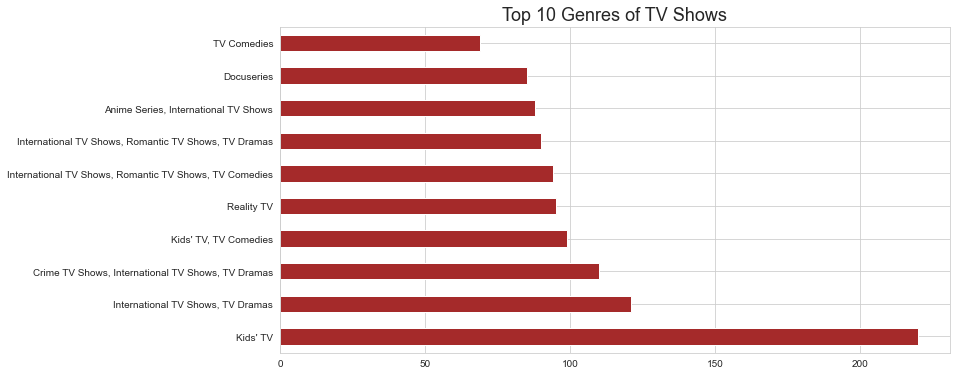

In [53]:
plt.figure(figsize=(12,6))
train[train["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

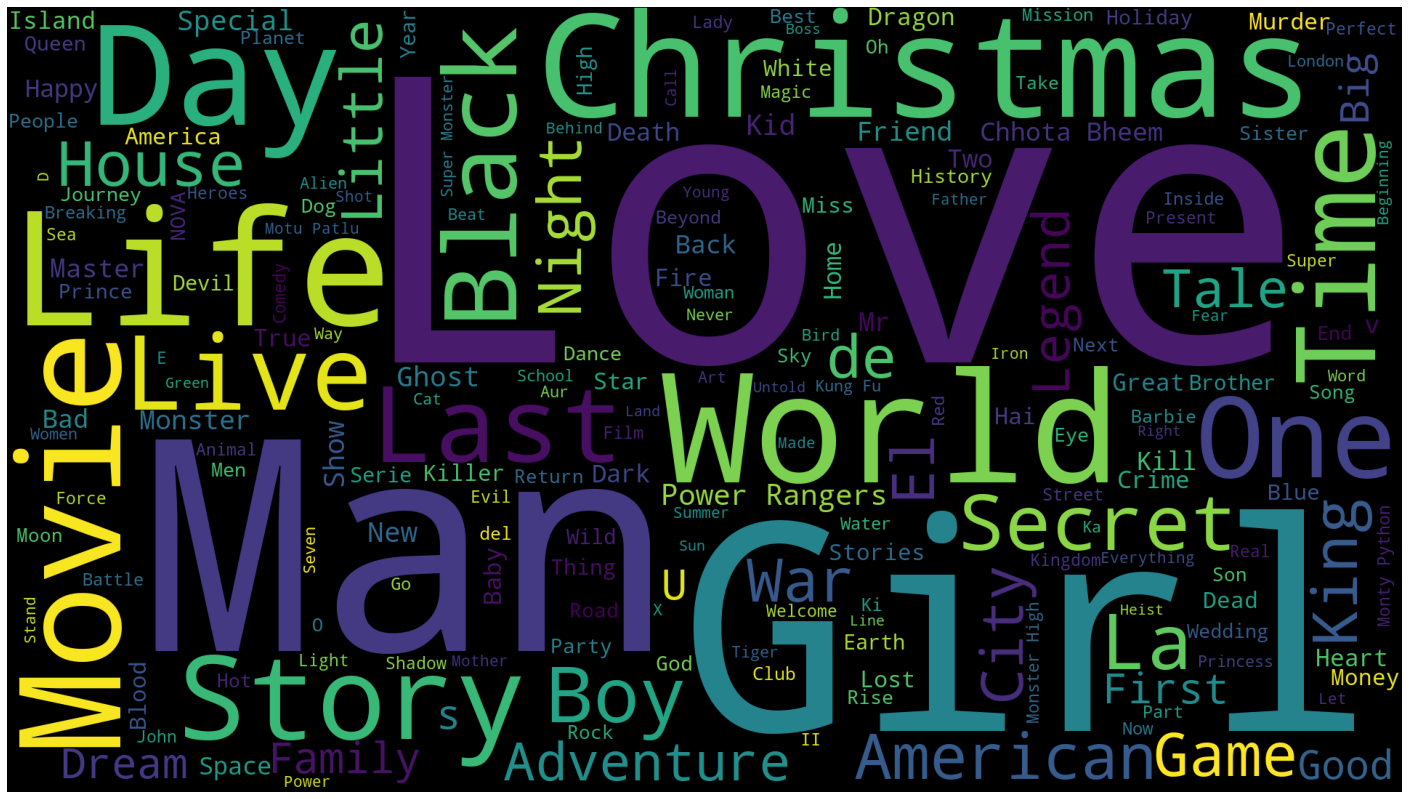

In [55]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# Modelling

In [34]:
def evaluate_model(model, x_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Random Forest

model yang saya pilih adalah random forest karena yang baik digunakan adalah menggunakan random forest karena dataset yang kita pakai sangat banyak dan berukuran besar sehingga model random forest tree berjalan dengan efisien.
Dan juga dataset yang kita pakai memiliki banyak missing value, sehingga model random forest dapat tetap mempertahankan akurasi.

In [48]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
pred_cv2=rf.predict(x_train)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_train,pred_cv2))
matrix=confusion_matrix(y_train,pred_cv2)
print(matrix)

1.0
[[   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0   33    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0   65    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  231    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0  392    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0  638    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0 1725    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  181    0    0    0
     0    0    0]
 [   0

# Model Deployment

In [ ]:
sudah dicoba tetapi selalu muncul "Internal server error"